In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

%matplotlib inline

In [2]:
# Tujuannya memprediksi mpg mobil

In [3]:
dfmpg = sns.load_dataset('mpg')
dfmpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
# tahapan mengecek tipe data set
dfmpg.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
dfmpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
#cek max value milik siapa
dfmpg[dfmpg['mpg'] == dfmpg['mpg'].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc


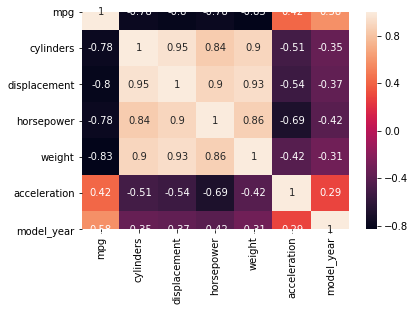

In [7]:
sns.heatmap(dfmpg.corr(), annot=True)

In [8]:
# weight, displacement, horse power, cylinders pny skor korelasi yg tinggi

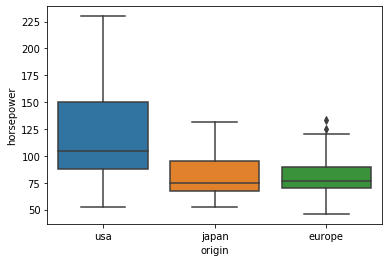

In [9]:
# boxlot untuk lihat outliers
sns.boxplot(x='origin', y='horsepower', data=dfmpg)

Contoh kasusnya:
- buat dashboard dgn user input: weight, horsepower, displacement, cylinder
- berdasarkan nilai diatas, maka akan memprediksi dari nilai mpg mobilnya

In [10]:
origin = dfmpg.groupby('origin')
origin_hp = origin.describe()['horsepower']
origin_hp

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,68.0,80.558824,20.157871,46.0,69.75,76.5,90.0,133.0
japan,79.0,79.835443,17.819199,52.0,67.00,75.0,95.0,132.0
usa,245.0,119.048980,39.897790,52.0,88.00,105.0,150.0,230.0


In [11]:
iqr = origin_hp.iloc[0,6]-origin_hp.iloc[0,4]
iqr

20.25

In [12]:
upper_bound = origin_hp.iloc[0,6] + 1.5*iqr
lower_bound = origin_hp.iloc[0,4] - 1.5*iqr
print(upper_bound)
print(lower_bound)

120.375
39.375


In [13]:
#cek data Outliers
dfmpg[(dfmpg['origin']=='europe') & (dfmpg['horsepower']>upper_bound)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
275,17.0,6,163.0,125.0,3140,13.6,78,europe,volvo 264gl
277,16.2,6,163.0,133.0,3410,15.8,78,europe,peugeot 604sl


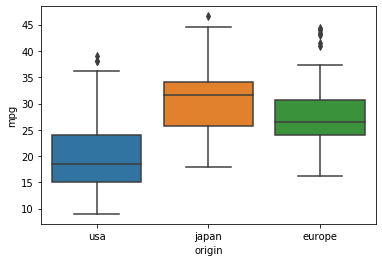

In [14]:
sns.boxplot(x='origin',y='mpg',data=dfmpg)

In [15]:
# dari boxplot diatas, mobil dari USA lbh boros(mpg kecil) jika dibanding mobil jepang / eropa

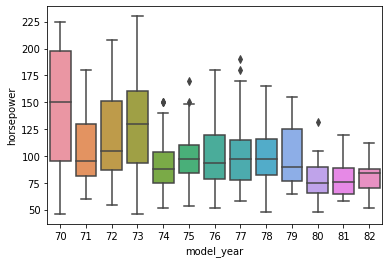

In [16]:
sns.boxplot(x='model_year', y='horsepower', data=dfmpg)

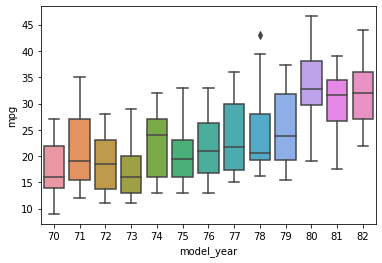

In [17]:
sns.boxplot(x='model_year',y='mpg', data=dfmpg)

In [18]:
#semakin bertampah tahun, mpg semakin besar / mobil semakin irit

In [19]:
#rata2 nilai setiap origin
origin.mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442


In [20]:
#nilai rata2 berdasarkan model_year
model_year_mean = dfmpg.groupby('model_year').mean()
model_year_mean

,mpg,cylinders,displacement,horsepower,weight,acceleration
model_year,,,,,,
70,17.689655,6.758621,281.413793,147.827586,3372.793103,12.948276
71,21.250000,5.571429,209.750000,107.037037,2995.428571,15.142857
72,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000
73,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500
74,22.703704,5.259259,171.740741,94.230769,2877.925926,16.203704
75,20.266667,5.600000,205.533333,101.066667,3176.800000,16.050000
76,21.573529,5.647059,197.794118,101.117647,3078.735294,15.941176
77,23.375000,5.464286,191.392857,105.071429,2997.357143,15.435714
78,24.061111,5.361111,177.805556,99.694444,2861.805556,15.805556


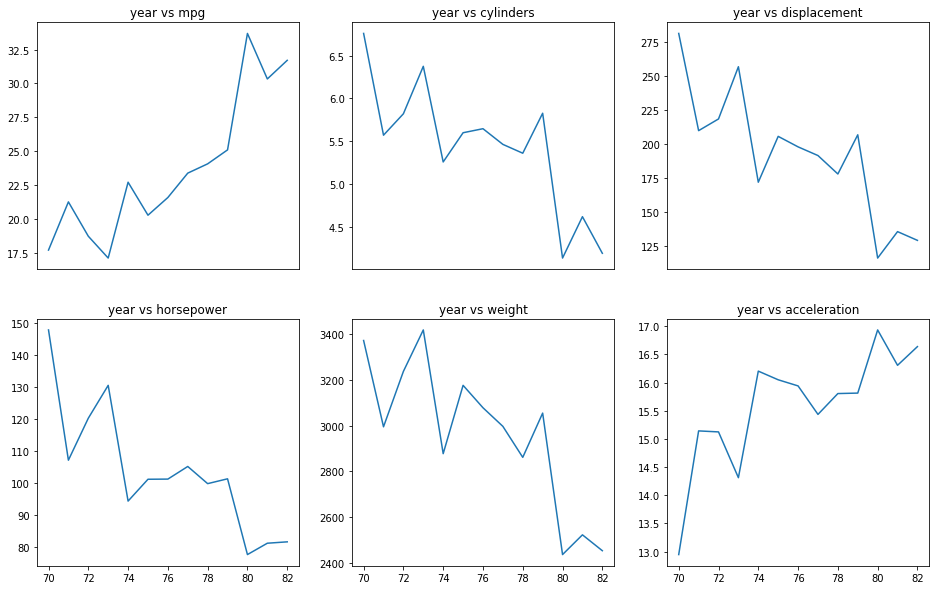

In [21]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
plt.title('year vs mpg')
plt.plot(model_year_mean.index, model_year_mean['mpg']) 
plt.xticks([])


plt.subplot(2,3,2)
plt.title('year vs cylinders')
plt.plot(model_year_mean.index, model_year_mean['cylinders']) 
plt.xticks([])

plt.subplot(2,3,3)
plt.title('year vs displacement')
plt.plot(model_year_mean.index, model_year_mean['displacement']) 
plt.xticks([])

plt.subplot(2,3,4)
plt.title('year vs horsepower')
plt.plot(model_year_mean.index, model_year_mean['horsepower']) 


plt.subplot(2,3,5)
plt.title('year vs weight')
plt.plot(model_year_mean.index, model_year_mean['weight']) 

plt.subplot(2,3,6)
plt.title('year vs acceleration')
plt.plot(model_year_mean.index, model_year_mean['acceleration']) 

plt.show()

In [22]:
#cari nilai Nan
dfmpg.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [23]:
dfmpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [24]:
# dfmpg.isna().sum() --> dijadikan DataFrame
dfnul = pd.DataFrame(
            {'nan' : dfmpg.isna().sum(),
            '%' : dfmpg.isna().sum()/len(dfmpg)*100},
            index=dfmpg.isna().sum().index)
dfnul

,nan,%
mpg,0,0.000000
cylinders,0,0.000000
displacement,0,0.000000
horsepower,6,1.507538
weight,0,0.000000
acceleration,0,0.000000
model_year,0,0.000000
origin,0,0.000000
name,0,0.000000


In [25]:
dfNull = dfmpg[dfmpg.horsepower.isna()].copy()
dfNull

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [26]:
#pembuktian masih ada Nan, Cocokkan dgn dfNull
dfmpg.isna().iloc[32:34,:] #baris ke 32 masih Nan pd kolom 'horsepower'

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,False,False,False,True,False,False,False,False,False
33,False,False,False,False,False,False,False,False,False


In [27]:
#pembuktian masih ada Nan, Cocokkan dgn dfNull
dfmpg.isna().iloc[126:331,:] #baris ke 126 & 130 masih Nan pd kolom 'horsepower'

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
126,False,False,False,True,False,False,False,False,False
127,False,False,False,False,False,False,False,False,False
128,False,False,False,False,False,False,False,False,False
129,False,False,False,False,False,False,False,False,False
130,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
326,False,False,False,False,False,False,False,False,False
327,False,False,False,False,False,False,False,False,False
328,False,False,False,False,False,False,False,False,False
329,False,False,False,False,False,False,False,False,False


In [28]:
#Mengisi nilai Nan/Null pd kolom 'horsepower'

def isi_horsepower(cols):
    hp = cols[0]
    my = cols[1]
    ori = cols[2]
    cyl = cols[3]
    
    if pd.isnull(hp):
        return (dfmpg[dfmpg['cylinders']==cyl]['horsepower'].mean()
               + dfmpg[dfmpg['model_year']==my]['horsepower'].mean()
               + dfmpg[dfmpg['origin']==ori]['horsepower'].mean()) /3
    else:
        return hp

In [29]:
#mengisi nilai null dfmpg dengan mean
dfmpg['horsepower'] = dfmpg[['horsepower', 'model_year', 'origin', 'cylinders']].apply(isi_horsepower,axis=1)
dfmpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [30]:
#mengisi nilai null dfNull dengan mean
dfNull['horsepower'] = dfNull[['horsepower','model_year','origin','cylinders']].apply(isi_horsepower,axis=1)
dfNull

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,101.362328,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,104.960088,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,79.026849,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,91.754102,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,80.022031,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,93.028601,3035,20.5,82,usa,amc concord dl


In [31]:
dfmpg['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

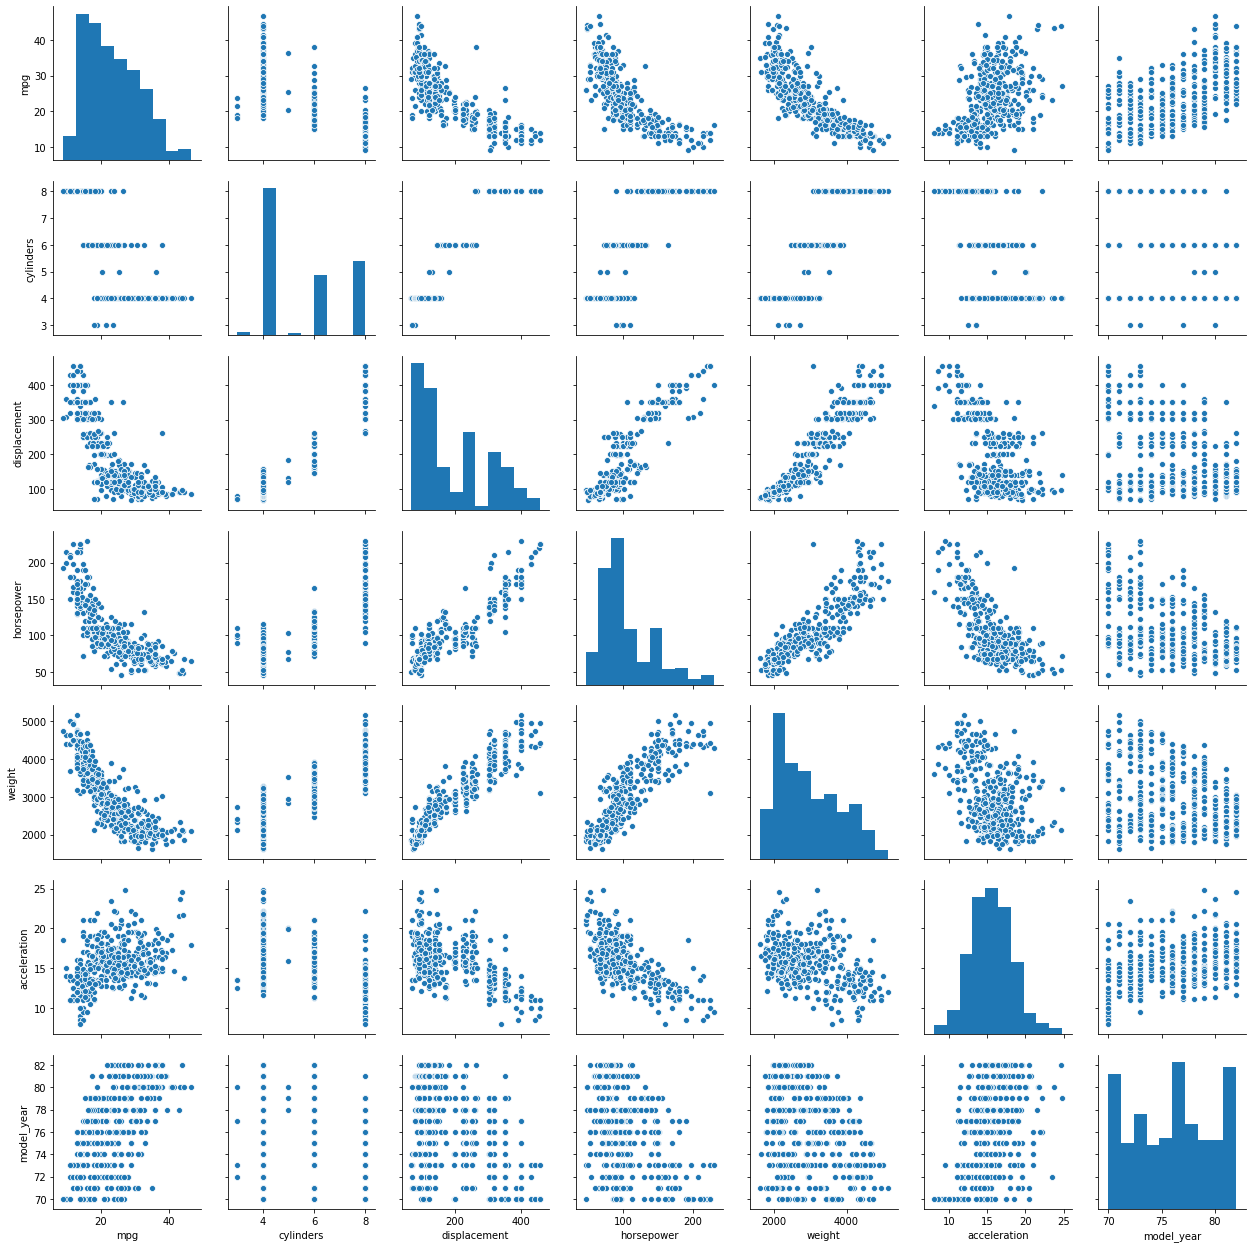

In [32]:
sns.pairplot(dfmpg)

In [33]:
def correlation_ratio(categories, measurements):
    
    def convert(data, to):
        converted = None
        if to == 'array':
            if isinstance(data, np.ndarray):
                converted = data
            elif isinstance(data, pd.Series):
                converted = data.values
            elif isinstance(data, list):
                converted = np.array(data)
            elif isinstance(data, pd.DataFrame):
                converted = data.as_matrix()
        elif to == 'list':
            if isinstance(data, list):
                converted = data
            elif isinstance(data, pd.Series):
                converted = data.values.tolist()
            elif isinstance(data, np.ndarray):
                converted = data.tolist()
        elif to == 'dataframe':
            if isinstance(data, pd.DataFrame):
                converted = data
            elif isinstance(data, np.ndarray):
                converted = pd.DataFrame(data)
        else:
            raise ValueError("Unknown data conversion: {}".format(to))
        if converted is None:
            raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
        else:
            return converted
        
    categories = convert(categories, 'array')
    measurements = convert(measurements, 'array')
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

In [34]:
dfmpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [35]:
correlation_ratio(dfmpg['origin'],dfmpg['mpg']) #origin berupa categorical

0.332864469155323

In [36]:
correlation_ratio(dfmpg['name'],dfmpg['mpg']) #name berupa categorical

0.9675598164519239

In [37]:
dfmpg['name'].value_counts()

ford pinto                  6
amc matador                 5
ford maverick               5
toyota corolla              5
chevrolet impala            4
                           ..
datsun 510 hatchback        1
datsun 510 (sw)             1
plymouth arrow gs           1
plymouth fury gran sedan    1
renault 18i                 1
Name: name, Length: 305, dtype: int64

## Feature Selection / engineering

In [38]:
copy = dfmpg.copy()
copy2 = dfmpg.copy()

In [39]:
copy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [40]:
#menghapus kolom name
dfmpg.drop('name',axis=1, inplace=True)

In [41]:
dfmpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [42]:
cylinder = pd.get_dummies(dfmpg['cylinders'])
modelyear = pd.get_dummies(dfmpg['model_year'])
origin = pd.get_dummies(dfmpg['origin'])
#hapus kolom cylinders, model_year, origin krn sudah punya dummiesnya
dfmpg.drop(['cylinders','model_year','origin'], inplace=True, axis=1)
#concat
dfmpg = pd.concat([dfmpg,cylinder,modelyear,origin],axis=1)
dfmpg.head()

,mpg,displacement,horsepower,weight,acceleration,3,4,5,6,8,...,76,77,78,79,80,81,82,europe,japan,usa
0,18.0,307.0,130.0,3504,12.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,15.0,350.0,165.0,3693,11.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,18.0,318.0,150.0,3436,11.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,16.0,304.0,150.0,3433,12.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,17.0,302.0,140.0,3449,10.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# supaya kolom terlihat semua
pd.set_option('display.max_columns',None) #kolom terlihat semua
#pd.set_option('display.max_rows', None) #baris terlihat semua
dfmpg

,mpg,displacement,horsepower,weight,acceleration,3,4,5,6,8,70,71,72,73,74,75,76,77,78,79,80,81,82,europe,japan,usa
0,18.0,307.0,130.0,3504,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,15.0,350.0,165.0,3693,11.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,18.0,318.0,150.0,3436,11.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,16.0,304.0,150.0,3433,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,17.0,302.0,140.0,3449,10.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
394,44.0,97.0,52.0,2130,24.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
395,32.0,135.0,84.0,2295,11.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
396,28.0,120.0,79.0,2625,18.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## Modelling

In [44]:
X = dfmpg.drop('mpg',axis=1) #semua kolom kecuali mpg
y = dfmpg['mpg']

In [45]:
X

,displacement,horsepower,weight,acceleration,3,4,5,6,8,70,71,72,73,74,75,76,77,78,79,80,81,82,europe,japan,usa
0,307.0,130.0,3504,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,350.0,165.0,3693,11.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,318.0,150.0,3436,11.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,304.0,150.0,3433,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,302.0,140.0,3449,10.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,140.0,86.0,2790,15.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
394,97.0,52.0,2130,24.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
395,135.0,84.0,2295,11.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
396,120.0,79.0,2625,18.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [46]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
#random state = me random data terlebih dahulu, kemudian di split. 
#               angkanya menunjukan data disimpan pada angka tsb, jd datasetnya tdk berubah jika di run berkali2
X_train

,displacement,horsepower,weight,acceleration,3,4,5,6,8,70,71,72,73,74,75,76,77,78,79,80,81,82,europe,japan,usa
303,85.0,65.0,2020,19.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
347,85.0,65.0,1975,19.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
149,120.0,97.0,2489,15.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
100,250.0,88.0,3021,16.5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
175,90.0,70.0,1937,14.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,112.0,88.0,2395,18.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
320,119.0,92.0,2434,15.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
15,198.0,95.0,2833,15.5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
125,198.0,95.0,3102,16.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [48]:
y_train

303    31.8
347    37.0
149    24.0
100    18.0
175    29.0
       ... 
369    34.0
320    37.0
15     22.0
125    20.0
265    17.5
Name: mpg, Length: 318, dtype: float64

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
X.columns

Index(['displacement',   'horsepower',       'weight', 'acceleration',
                    3,              4,              5,              6,
                    8,             70,             71,             72,
                   73,             74,             75,             76,
                   77,             78,             79,             80,
                   81,             82,       'europe',        'japan',
                'usa'],
      dtype='object')

In [51]:
coeff_lm = pd.DataFrame(lm.coef_,index=X.columns,columns=['Coefficient'])
coeff_lm

,Coefficient
displacement,0.014438
horsepower,-0.033762
weight,-0.005943
acceleration,0.030567
3,-5.079387
4,1.136166
5,4.201393
6,-1.442028
8,1.183856
70,-3.282788


In [52]:
print(lm.intercept_)

41.596716570597536


In [53]:
#prediksi mpg
predictions = lm.predict(X_test)
predictions 

array([36.36169963, 19.74954735, 31.70251969, 29.29340276, 27.10642267,
       37.07015367, 25.24852246, 17.89717802, 29.1686559 , 24.95483976,
       23.33710014, 28.03252106, 37.07555558, 28.43550552, 20.06041842,
       25.02266273, 21.19620929, 13.52885905, 11.39150748, 29.81668961,
       17.75604607, 10.13572172, 35.04331466, 20.80411719, 25.41788901,
       19.67605543, 23.73777985, 20.40870813, 31.13727719, 30.94398975,
       16.01651207, 11.65619143, 28.47139497, 10.26164966, 37.08926591,
       26.19766102, 34.74325361, 16.98189837, 18.89425331, 13.19248065,
       28.96403337, 32.64629209, 15.62183191, 17.47578081, 30.5178427 ,
       30.5663289 , 18.29075058, 15.53516709, 30.34808247, 16.77956379,
       16.97340366, 18.83168849, 25.57850778, 16.61590367, 36.41725504,
       32.40849885, 22.51064165, 14.09565123, 30.80613776, 26.78350434,
       23.85412328, 21.81928291, 37.89999376, 17.99760221, 30.94249763,
       20.97873893, 19.89401705, 17.71992324, 14.34485008, 23.80

Text(0, 0.5, 'Y Predictions')

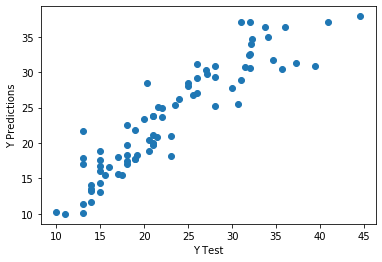

In [54]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Y Predictions')

In [55]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

MAE: 2.445436312031176
MSE: 9.788440994165857
RMSE: 3.128648429300719
R2: 0.8399404587644691


In [56]:
#untuk mempermudah menampilkan evaluation metrics . tdk perlu print satu per satu
def evaluation(model, xtest, ytest):
    predictions = model.predict(xtest)
    eval_dict = {}
    eval_dict['MAE'] = mean_absolute_error(ytest, predictions)
    eval_dict['MSE'] = mean_squared_error(ytest, predictions)
    eval_dict['RMSE'] = np.sqrt(mean_squared_error(ytest, predictions))
    eval_dict['R2'] = r2_score(ytest, predictions)
    print(eval_dict)
    
    return eval_dict

In [57]:
eval_lm = evaluation(lm, X_test, y_test)

{'MAE': 2.445436312031176, 'MSE': 9.788440994165857, 'RMSE': 3.128648429300719, 'R2': 0.8399404587644691}


In [58]:
eval_lm_train = evaluation(lm,X_train, y_train)

{'MAE': 2.055793001994953, 'MSE': 7.481394187688834, 'RMSE': 2.735213737112483, 'R2': 0.8769765183661761}


In [59]:
#hasil metrics dijadikan data frame supaya lbh mudah dilihat
eval_df = pd.DataFrame(
    {
    'MAE':[eval_lm['MAE'],eval_lm_train['MAE']],
    'MSE':[eval_lm['MSE'],eval_lm_train['MSE']],
    'RMSE':[eval_lm['RMSE'],eval_lm_train['RMSE']],
    'R2':[eval_lm['R2'],eval_lm_train['R2']]
    }, index=['LinearModel1_test', 'LinearModel1_train']
)

eval_df

,MAE,MSE,RMSE,R2
LinearModel1_test,2.445436,9.788441,3.128648,0.839940
LinearModel1_train,2.055793,7.481394,2.735214,0.876977


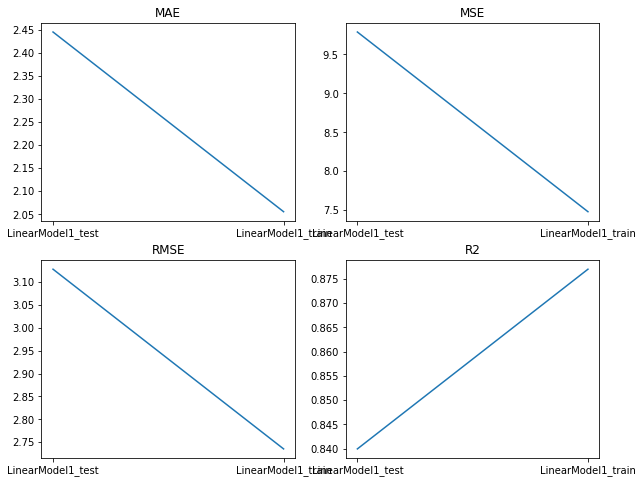

In [60]:
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('MAE')
plt.plot(eval_df.index, eval_df['MAE'])

plt.subplot(222)
plt.title('MSE')
plt.plot(eval_df.index, eval_df['MSE'])

plt.subplot(223)
plt.title('RMSE')
plt.plot(eval_df.index, eval_df['RMSE'])

plt.subplot(224)
plt.title('R2')
plt.plot(eval_df.index, eval_df['R2'])

## Perbandingan Evaluation Metrics

In [61]:
copy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [62]:
copy.drop('name', axis=1, inplace=True)
copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [63]:
# Kolom 'name' dijasikan dummies
copy = pd.get_dummies(copy)
copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [64]:
X2 = copy.drop('mpg', axis=1)
y2 = copy['mpg']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=10)
X2_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
303,4,85.0,65.0,2020,19.2,79,0,1,0
347,4,85.0,65.0,1975,19.4,81,0,1,0
149,4,120.0,97.0,2489,15.0,74,0,1,0
100,6,250.0,88.0,3021,16.5,73,0,0,1
175,4,90.0,70.0,1937,14.0,75,1,0,0
...,...,...,...,...,...,...,...,...,...
369,4,112.0,88.0,2395,18.0,82,0,0,1
320,4,119.0,92.0,2434,15.0,80,0,1,0
15,6,198.0,95.0,2833,15.5,70,0,0,1
125,6,198.0,95.0,3102,16.5,74,0,0,1


In [65]:
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
lm2.coef_

array([-0.40654537,  0.02448839, -0.01552087, -0.00706923,  0.09837853,
        0.79311662,  0.90044755,  1.01314121, -1.91358875])

In [67]:
coeff_lm2 = pd.DataFrame(lm2.coef_, index=X2.columns, columns=['Coefficient'])
coeff_lm2

,Coefficient
cylinders,-0.406545
displacement,0.024488
horsepower,-0.015521
weight,-0.007069
acceleration,0.098379
model_year,0.793117
origin_europe,0.900448
origin_japan,1.013141
origin_usa,-1.913589


In [68]:
#lihat coefficient lm
coeff_lm

,Coefficient
displacement,0.014438
horsepower,-0.033762
weight,-0.005943
acceleration,0.030567
3,-5.079387
4,1.136166
5,4.201393
6,-1.442028
8,1.183856
70,-3.282788


In [69]:
eval_lm2 = evaluation(lm2, X2_test, y2_test)

{'MAE': 2.8727236158390306, 'MSE': 12.387579055482442, 'RMSE': 3.5195992748440044, 'R2': 0.7974396309053549}


In [70]:
#hasil metrics dijadikan data frame supaya lbh mudah dilihat
eval_df = pd.DataFrame(
    {
    'MAE':[eval_lm['MAE'],eval_lm_train['MAE'],eval_lm2['MAE']],
    'MSE':[eval_lm['MSE'],eval_lm_train['MSE'],eval_lm2['MSE']],
    'RMSE':[eval_lm['RMSE'],eval_lm_train['RMSE'],eval_lm2['RMSE']],
    'R2':[eval_lm['R2'],eval_lm_train['R2'],eval_lm2['R2']]
    }, index=['LinearModel1_test', 'LinearModel1_train','LinearModel2_test']
)

eval_df

,MAE,MSE,RMSE,R2
LinearModel1_test,2.445436,9.788441,3.128648,0.839940
LinearModel1_train,2.055793,7.481394,2.735214,0.876977
LinearModel2_test,2.872724,12.387579,3.519599,0.797440


([0, 1, 2], <a list of 3 Text xticklabel objects>)

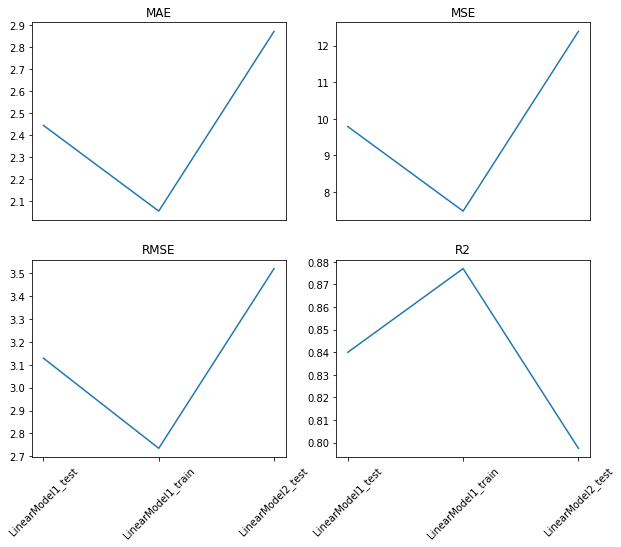

In [71]:
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('MAE')
plt.plot(eval_df.index, eval_df['MAE'])
plt.xticks([])

plt.subplot(222)
plt.title('MSE')
plt.plot(eval_df.index, eval_df['MSE'])
plt.xticks([])

plt.subplot(223)
plt.title('RMSE')
plt.plot(eval_df.index, eval_df['RMSE'])
plt.xticks(rotation=45)

plt.subplot(224)
plt.title('R2')
plt.plot(eval_df.index, eval_df['R2'])
plt.xticks(rotation=45)

Dari data plot di atas, dapat saya simpulkan bahwa, model yang ditrain menggunakan data yang `cylinder`, `year_model`, `origin` dijadikan dummy variable itu lebih baik hasilnya daripada model ke-2

## Ridge

In [72]:
#Coba menggunakan ridge apakah RMSE akan lbh baik?

In [73]:
from sklearn.linear_model import Ridge, Lasso
rm = Ridge(alpha=0.1)
rm.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
rm_coef = pd.DataFrame(rm.coef_, index=X.columns, columns=['Coefficient'])
rm_coef

,Coefficient
displacement,0.014658
horsepower,-0.034277
weight,-0.005931
acceleration,0.031185
3,-4.870594
4,1.156812
5,4.002053
6,-1.446340
8,1.158069
70,-3.254332


In [75]:
eval_rm = evaluation(rm, X_test, y_test)
eval_rm

{'MAE': 2.4422171507485806, 'MSE': 9.738933114649289, 'RMSE': 3.120726376126124, 'R2': 0.840750006320376}


{'MAE': 2.4422171507485806,
 'MSE': 9.738933114649289,
 'RMSE': 3.120726376126124,
 'R2': 0.840750006320376}

In [76]:
eval_df = pd.DataFrame({'MAE':[eval_lm['MAE'],eval_rm['MAE']],
                        'MSE':[eval_lm['MSE'], eval_rm['MSE']],
                        'RMSE':[eval_lm['RMSE'], eval_rm['RMSE']],
                        'R2':[eval_lm['R2'],eval_rm['R2']]},
                       index=['LinearModel1_test', 'Ridge1_test'])
eval_df

,MAE,MSE,RMSE,R2
LinearModel1_test,2.445436,9.788441,3.128648,0.83994
Ridge1_test,2.442217,9.738933,3.120726,0.84075


Dapat diartikan bahwa model `Ridge1_test` lebih baik dari model `LinearModel1_test` karena memiliki skor RMSE yang lbh rendah(lebih baik) 

## Bagaimana jika kolom `name` hanya diambil merknya saja ?

In [77]:
copy2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [78]:
correlation_ratio(copy2['name'], copy2['mpg'])

0.9675598164519239

In [79]:
copy2['name'].value_counts()

ford pinto                  6
amc matador                 5
ford maverick               5
toyota corolla              5
chevrolet impala            4
                           ..
datsun 510 hatchback        1
datsun 510 (sw)             1
plymouth arrow gs           1
plymouth fury gran sedan    1
renault 18i                 1
Name: name, Length: 305, dtype: int64

In [80]:
def merk(name):
    name_list = name.split()
    return name_list[0]

In [81]:
copy2['brand'] = copy2['name'].apply(merk)

In [82]:
copy2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford


In [83]:
# chevy kan harusnya cehvrolete, kita cek dulu
brand_df = pd.DataFrame(copy2['brand'].value_counts(), copy2['brand'].value_counts().index)
brand_df

,brand
ford,51
chevrolet,43
plymouth,31
amc,28
dodge,28
toyota,25
datsun,23
buick,17
pontiac,16
volkswagen,15


In [89]:
brand_df.index

Index(['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'mazda',
       'oldsmobile', 'fiat', 'peugeot', 'audi', 'chrysler', 'volvo', 'vw',
       'renault', 'saab', 'subaru', 'opel', 'chevy', 'cadillac',
       'mercedes-benz', 'bmw', 'maxda', 'chevroelt', 'nissan', 'capri',
       'mercedes', 'triumph', 'vokswagen', 'toyouta', 'hi'],
      dtype='object')

In [91]:
error_name = ['chevy', 'chevroelt', 'vokswagen', 'vw', 'maxda', 'toyouta', 'mercedes']

In [94]:
# Cleaning brand mobil

def rebrand(brand):
    if brand in error_name:
        if brand == 'chevy':
            return 'chevrolet'
        elif brand == 'chevroelt':
            return 'chevrolet'
        elif brand == 'vokswagen':
            return 'volkswagen'
        elif brand == 'vw':
            return 'volkswagen'
        elif brand == 'maxda':
            return 'mazda'
        elif brand == 'toyouta':
            return 'toyota'
        elif brand == 'mercedes':
            return 'mercedes-benz'
        else :
            return brand
    else :
        return brand

In [95]:
copy2['rebrand'] = copy2['brand'].apply(rebrand)
copy2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,rebrand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,ford
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw,volkswagen
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,ford


In [98]:
len(copy2['rebrand'].unique())

30

In [100]:
correlation_ratio(copy2['rebrand'], copy2['mpg'])

0.41367078124928797

In [102]:
copy2['rebrand'].value_counts()

ford             51
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
peugeot           8
fiat              8
audi              7
chrysler          6
volvo             6
renault           5
opel              4
saab              4
subaru            4
mercedes-benz     3
cadillac          2
bmw               2
triumph           1
hi                1
nissan            1
capri             1
Name: rebrand, dtype: int64

In [103]:
#drop origin, name, brand krn kita gak mau pake
copy2.drop(['origin', 'name', 'brand'], axis =1, inplace=True)
copy2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,rebrand
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,buick
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,amc
4,17.0,8,302.0,140.0,3449,10.5,70,ford
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,ford
394,44.0,4,97.0,52.0,2130,24.6,82,volkswagen
395,32.0,4,135.0,84.0,2295,11.6,82,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,ford


In [104]:
copy2_dum = pd.get_dummies(copy2)
copy2_dum.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,rebrand_amc,rebrand_audi,rebrand_bmw,rebrand_buick,rebrand_cadillac,rebrand_capri,rebrand_chevrolet,rebrand_chrysler,rebrand_datsun,rebrand_dodge,rebrand_fiat,rebrand_ford,rebrand_hi,rebrand_honda,rebrand_mazda,rebrand_mercedes-benz,rebrand_mercury,rebrand_nissan,rebrand_oldsmobile,rebrand_opel,rebrand_peugeot,rebrand_plymouth,rebrand_pontiac,rebrand_renault,rebrand_saab,rebrand_subaru,rebrand_toyota,rebrand_triumph,rebrand_volkswagen,rebrand_volvo
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


MODELLING X=reband y=mpg

In [106]:
X3 = copy2_dum.drop('mpg',axis=1)
y3 = copy2_dum['mpg']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size=0.2, random_state=10)

In [107]:
X_train

,displacement,horsepower,weight,acceleration,3,4,5,6,8,70,71,72,73,74,75,76,77,78,79,80,81,82,europe,japan,usa
303,85.0,65.0,2020,19.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
347,85.0,65.0,1975,19.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
149,120.0,97.0,2489,15.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
100,250.0,88.0,3021,16.5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
175,90.0,70.0,1937,14.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,112.0,88.0,2395,18.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
320,119.0,92.0,2434,15.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
15,198.0,95.0,2833,15.5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
125,198.0,95.0,3102,16.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [108]:
lr3 = LinearRegression()
lr3.fit(X3_train, y3_train)
eval_lr3 = evaluation(lr3, X3_test, y3_test)

{'MAE': 3.166152974370109, 'MSE': 14.77009948702214, 'RMSE': 3.8431887134282308, 'R2': 0.7584809113826225}


In [110]:
eval_df = pd.DataFrame({'MAE':[eval_lm['MAE'],eval_rm['MAE'],eval_lr3['MAE']],
                        'MSE':[eval_lm['MSE'], eval_rm['MSE'],eval_lr3['MSE']],
                        'RMSE':[eval_lm['RMSE'], eval_rm['RMSE'],eval_lr3['RMSE']],
                        'R2':[eval_lm['R2'],eval_rm['R2'],eval_lr3['R2']]},
                       index=['LinearModel1_test', 'Ridge1_test', 'LinearModel3_test'])
eval_df

,MAE,MSE,RMSE,R2
LinearModel1_test,2.445436,9.788441,3.128648,0.839940
Ridge1_test,2.442217,9.738933,3.120726,0.840750
LinearModel3_test,3.166153,14.770099,3.843189,0.758481


Dengan feature `rebrand` yg berasal dari feature engineering `name`,
featur selcetion = `mpg`	`cylinders`	`displacement`	`horsepower`	`weight`	`acceleration`	`model_year` `rebrand` 
didapatkan kesimpulan bahwa Model `LinearModel3_test` tidak lbh baik dari `Ridge1_test` karena RMSE nya lbh besar 

## Production

In [84]:
#Tahap Backend

In [85]:
rm

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [86]:
X_train

,displacement,horsepower,weight,acceleration,3,4,5,6,8,70,71,72,73,74,75,76,77,78,79,80,81,82,europe,japan,usa
303,85.0,65.0,2020,19.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
347,85.0,65.0,1975,19.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
149,120.0,97.0,2489,15.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
100,250.0,88.0,3021,16.5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
175,90.0,70.0,1937,14.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,112.0,88.0,2395,18.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
320,119.0,92.0,2434,15.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
15,198.0,95.0,2833,15.5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
125,198.0,95.0,3102,16.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [87]:
#Setiap kolom/feature yang dipilih akan masuk dropdown menu pada dashboard 

In [88]:
def mpg_prediction(displacement, horsepower, weigth, accel, cyl3, cyl4, cyl5, cyl6, cyl8, yr70, yr71, yr72, yr73)

SyntaxError: invalid syntax (<ipython-input-88-f3dd01ba3381>, line 1)